# Chipotle

**Dataset**: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

## Getting and Knowing the Data

**Import necessary libraries**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# set this so the plots are shown embedded instead of pop-up windows
%matplotlib inline 

**Import the dataset from the url address and assign it to a variable**

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# NOTE: data is stored in tsv file, which is separated by tab
chipotle_df = pd.read_csv(url, sep='\t')

**See the first 10 entries**

In [22]:
chipotle_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


**Check the number of observations**

In [8]:
chipotle_df.shape[0]

4622

There are 4622 number of observations.

In [9]:
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


**Check the number of columns in the dataset**

In [10]:
chipotle_df.shape[1]

5

There are 5 columns in the dataset.

**Print the name of all the columns**

In [11]:
chipotle_df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

**Check the index of the dataset**

In [12]:
chipotle_df.index

RangeIndex(start=0, stop=4622, step=1)

<font color=blue>**Find the most-ordered item**

In [30]:
item_df = chipotle_df.groupby('item_name').sum()
item_sort_df = item_df.sort_values('quantity', ascending=False)
item_sort_df.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


**Find the number of the most-ordered item**

In [26]:
item_sort_df.head(1).quantity

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

**Find the most ordered item in the choice_description column**

In [28]:
choice_df = chipotle_df.groupby('choice_description').sum()
choice_sort_df = choice_df.sort_values('quantity', ascending=False)
choice_sort_df.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


**Find the total number of items ordered**

In [32]:
total_items_ordered = chipotle_df['quantity'].sum()
total_items_ordered

4972

<font color=blue>**Convert the item price into a float**

In [36]:
# Check the item price type
chipotle_df.item_price.dtype

dtype('O')

In [37]:
# Create a lambda function and change the type of item price
dollarizer = lambda x: float(x[1:-1])
chipotle_df.item_price = chipotle_df.item_price.apply(dollarizer)

In [38]:
# Check the item price type
chipotle_df.item_price.dtype

dtype('float64')

**Compute the revenue for the period in the dataset**

In [41]:
total_revenue = (chipotle_df['quantity'] * chipotle_df['item_price']).sum()
print('Total revenue was: ${:.2f}'.format(total_revenue))

Total revenue was: $39237.02


<font color=blue>**Compute the total number of orders made for the period in the dataset**

In [54]:
total_order = chipotle_df['order_id'].value_counts().shape[0]
# total_order = chipotle_df['order_id'].value_counts().count()
print('Total number of orders made was: {}'.format(total_order))

Total number of orders made was: 1834


**Compute the average revenue amount per order**

In [50]:
average_revenue = total_revenue / total_order
print('The average revenue amount was: {:.2f}'.format(average_revenue))

The average revenue amount was: 21.39


**Compute the number of different items**

In [110]:
unique_items = chipotle_df['item_name'].value_counts().shape[0]
# unique_items = chipotle_df['item_name'].value_counts().count()
unique_items

50

## Filtering and Sorting

<font color=blue>**How many products cost more than $10.00?**

In [111]:
# NOTE: for quantity > 1, item_price may be > 10.00
chipotle_df[(chipotle_df['item_price'] > 10.00) & (chipotle_df['quantity'] == 1)]

,order_id,quantity,item_name,choice_description,item_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


**What is the price of each item?**

In [114]:
# Print a DataFrame with only two columns item_name and item_price
# chipotle_df[chipotle_df['quantity'] == 1][['item_name', 'item_price']].set_index('item_name')

# Delete the duplicates in item_name, quantity and choice_description
chipotle_drop_df = chipotle_df.drop_duplicates(['item_name','quantity','choice_description'])
chipotle_drop_df[chipotle_df['quantity'] == 1]


/var/folders/8l/bxp0rg6s0250bdtld8bb_z840000gn/T/ipykernel_8404/1527062837.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chipotle_drop_df[chipotle_df['quantity'] == 1]


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25


**Sort by the name of items**

In [116]:
chipotle_df.sort_values('item_name')

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


**What was the quantity of the most expensive item ordered?**

In [122]:
chipotle_df.sort_values('item_price', ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


**How many times was a Veggie Salad Bowl ordered?**

In [127]:
chipotle_df[chipotle_df['item_name'] == 'Veggie Salad Bowl'].shape[0]

18

**How many timees did someone order more than one Canned Soda?**

In [132]:
chipotle_df[(chipotle_df['item_name'] == 'Canned Soda') & (chipotle_df['quantity'] > 1)].shape[0]

20

## Visualization

**Create a bar plot of the top 5 items bought**

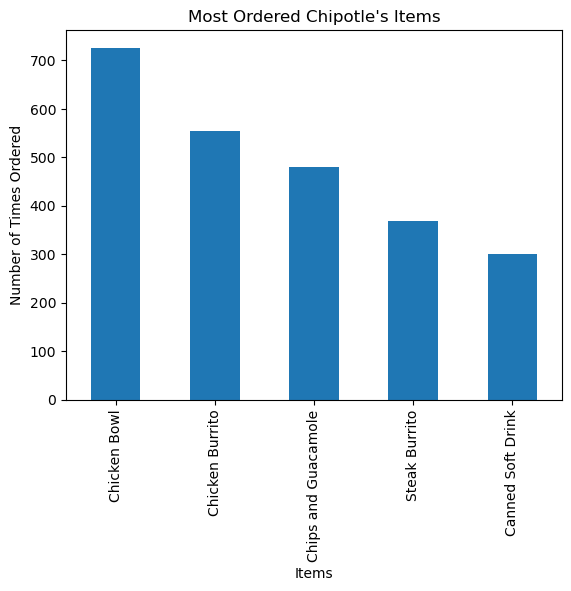

In [171]:
# Solution 1

# Get the item_name column
x = chipotle_df['item_name']

# Count the frequencies for each item with key(item_name) and value(frequency)
item_counts = Counter(x)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(item_counts, orient='index')

# Sort the frequencies in descending order 
df = df.sort_values(0, ascending=False).head(5)

# Create a bar plot
df.plot(kind='bar', legend=None) # turn off legend
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most Ordered Chipotle\'s Items')
plt.show()

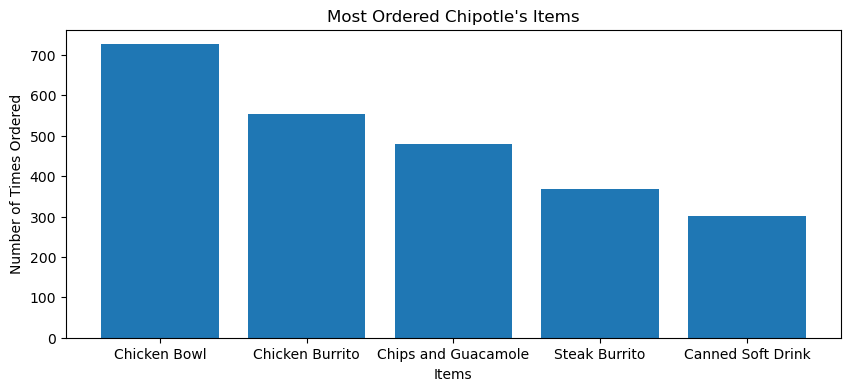

In [174]:
# Solution 2

# Find the 5 most ordered items
# Groupby the itema_name and then count
item_counts = chipotle_df.groupby('item_name').item_name.count()
item_top5 = item_counts.sort_values(ascending=False).head(5)

# Creat a bar plot
plt.figure(figsize=(10, 4))
plt.bar(item_top5.index, item_top5.values)
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most Ordered Chipotle\'s Items')
plt.show()

**Create a scatter plot with the number of items ordered per order price**

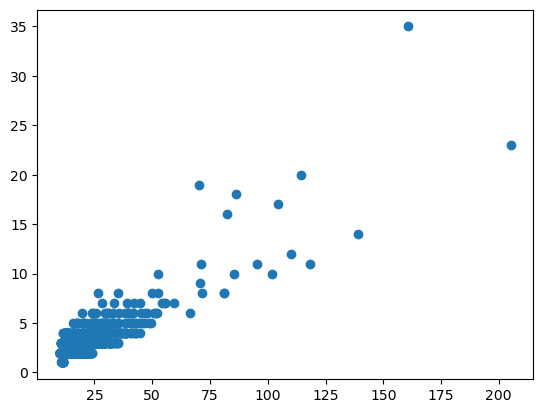

In [182]:
# Groupby the order_id and sum
orders = chipotle_df.groupby('order_id').sum()

# Create a scatter plot
plt.scatter(x=orders.item_price, y=orders.quantity);